## Assignment for Week 3 - Naive-Bayes

### Exercise: Bayesian Classification

**Important Note:**
This exercise is not a programming exercise, it is a math exercise to help reinforce the math behind a Bayesian Classification.  You can fill free to complete this in any method you feel is appropriate (ie: pencil/paper (you will need to scan your work to submit), Excel workbook, markdown text with a jupyter notebook, etc)<br>

Please show all your work.

1. In a study of pleas and prison sentences, it is reported that 42% of the subjects were sent to prison. Among those sent to prison, 38% plead guilty. Among those not sent to prison, 50% plead guilty.<br>
&emsp;a) If a subject is randomly selected, what is the probability of getting a person who was not sent to prison? <br>
&emsp;b) If a subject is randomly selected, and it is known that the subject entered a quilty plea, what is the probability that this subject was not sent to prison? <br>
&emsp;c) If a subject is randomly selected, what is the probability of getting someone who was sent to prison?<br>
&emsp;d) If a subject is randomly selected, and it is known that the subject entered a guilty plea, what is the probability that this person was sent to prison?


2. Given the following table:

|Customer ID| Gender  |Car Type|Shirt Size |Class|
|:---------:|:-------:|:------:|:---------:|:---:|
|1          |M        |Family  |Small      |CO   |
|2          |M        |Sports  |Medium     |CO   |
|3          |M        |Sports  |Medium     |CO   |
|4          |M        |Sports  |Large      |CO   |
|5          |M        |Sports  |Extra Large|CO   |
|6          |M        |Sports  |Extra Large|CO   |
|7          |F        |Sports  |Small      |CO   |
|8          |F        |Sports  |Small      |CO   |
|9          |F        |Sports  |Medium     |CO   |
|10         |F        |Luxury  |Large      |CO   |
|11         |M        |Family  |Large      |C1   |
|12         |M        |Family  |Extra Large|C1   |
|13         |M        |Family  |Medium     |C1   |
|14         |M        |Luxury  |Extra Large|C1   |
|15         |F        |Luxury  |Small      |C1   |
|16         |F        |Luxury  |Small      |C1   |
|17         |F        |Luxury  |Medium     |C1   |
|18         |F        |Luxury  |Medium     |C1   |
|19         |F        |Luxury  |Medium     |C1   |
|20         |F        |Luxury  |Large      |C1   |
<br>

&emsp;a) What is the value of each of the following probabilities?<br>
&emsp;   - P(Gender=M | Class=C0)<br>
&emsp;   - P(Gender=F | Class=C1)<br>
&emsp;   - P(Car Type=Family | Class=C0)<br>
&emsp;   - P(Car Type=Family | Class=C1)<br>
&emsp;   - P(Shirt Size=Medium | Class=C0)<br>
&emsp;   - P(Shirt Size=Medium | Class=C1)<br>
<br>
&emsp;b) Use Naive Bayes Classifier to find the class of P(Gender=F | Car Type=Family| Shirt Size=Medium)


### Project: Text Classification
**Data Set:** spam.csv located at https://www.kaggle.com/uciml/sms-spam-collection-dataset/version/1 <br>
**Note:** you might want to use `encoding of latin-1` when loading this file (https://www.kaggle.com/benvozza/spam-classification)

**Objective:** to classify SMS message as spam or not spam (ham).

From the given data set, use Naïve Bayes to classify the SMS message.
The framework for text classification is briefly summarized here:
* Transformation of your dataset(change to lower case, remove numbers, remove punctuation, stop words, white space, word stemming, etc.)
* Document-Term-Matrix creation – matrix of word counts for each individual document in the matrix (e.g. documents as rows, words as columns or vice versa)
* Text Analysis (e.g. word counts, visualizations using wordclouds)

**Helpful links:**<br>
https://machinelearningmastery.com/clean-text-machine-learning-python/ <br>
http://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization <br>
https://machinelearningmastery.com/prepare-text-data-machine-learning

**Analysis Questions:**<br>
* What is the accuracy of the model?  Report your finding with corresponding tables/graphs.
* Print the 5 most frequent words in each class, and their posterior probability generated by the model.
* How would you improve the model performance?
* If the data set is bigger, do you think the accuracy increases? Discuss.

### Deliverables:

The calculation exercise can be complete on paper, excel, or markdown text. The coding project is to be done in a .ipynb file (just like the other coding exercises).

**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

# Assignment Solution

Part 1: Calculation excersise was done on paper and scanned copy was uploaded

Part 2: Text classification

**Objective:** to classify SMS message as spam or not spam (ham).

In [1]:
# Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import seaborn as sns
from wordcloud import WordCloud

In [12]:
# Loading and reading the data set 

# Read the CSV file into a DataFrame
data = pd.read_csv('F:/Balaram/ML course/spam.csv', encoding='ISO-8859-1')

# Rename columns
data.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

# Display the first few rows of the DataFrame
print(data.head())

  label                                            message Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [13]:
# Looking at the first few rows of the dataset
print(data.head(10))

  label                                            message Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN  

The data has the message and corresponding label spam or ham (not spam)

In [14]:
# import stopwords dataset
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Subhadra_Princess\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# Data transformation

# 1. Changing to lowercase
data['transformed_message'] = data['message'].str.lower()

# 2. Remove Numbers
data['transformed_message'] = data['transformed_message'].apply(lambda x: ''.join([char for char in x if not char.isdigit()])) 
# this code remove the elements in the information if they are digits

#3. Remove punctuation
data['transformed_message'] = data['transformed_message'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
# This code will remove all the punctuations like , . etc

# 4. Remove stopwords
stop_words = set(stopwords.words('english'))
data['transformed_message'] = data['transformed_message'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# 5. Remove extra white spaces
data['transformed_message'] = data['transformed_message'].apply(lambda x: ' '.join(x.split()))

# 6. Stemming
stemmer = PorterStemmer()
data['transformed_message'] = data['transformed_message'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))


In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['transformed_message'], data['label'], test_size=0.2, random_state=42)

Document-Term Matrix (First 5 Documents):
   aa  aah  aaniy  aaooooright  aathilov  ab  abbey  abeg  abel  aberdeen  \
0   0    0      0            0         0   0      0     0     0         0   
1   0    0      0            0         0   0      0     0     0         0   
2   0    0      0            0         0   0      0     0     0         0   
3   0    0      0            0         0   0      0     0     0         0   
4   0    0      0            0         0   0      0     0     0         0   

   ...  ìï  ìïll  ûthank  ûªm  ûªt  ûªv  ûï  ûïharri  ûò  ûówel  
0  ...   0     0       0    0    0    0   0        0   0      0  
1  ...   0     0       0    0    0    0   0        0   0      0  
2  ...   0     0       0    0    0    0   0        0   0      0  
3  ...   0     0       0    0    0    0   0        0   0      0  
4  ...   0     0       0    0    0    0   0        0   0      0  

[5 rows x 6294 columns]


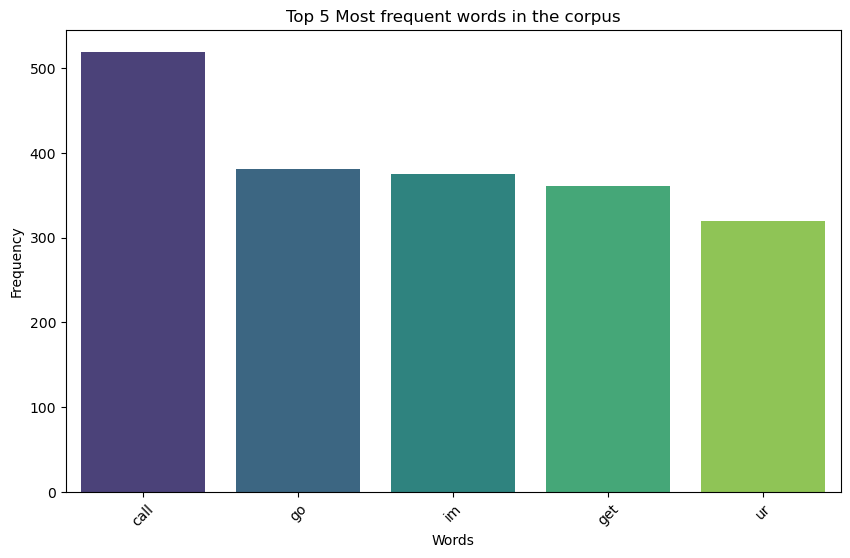

In [28]:
# Create a Document-Term Matrix using CountVectorizer
vectorizer = CountVectorizer()
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

# Convert the sparse matrix to a dense array
X_train_dense = X_train_dtm.toarray()

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame for visualization
dtm_df = pd.DataFrame(X_train_dense, columns=feature_names)

# Display the first few rows of the DTM DataFrame
print("Document-Term Matrix (First 5 Documents):")
print(dtm_df.head(5))


# Visualize the most frequent words in the entire corpus
word_frequencies = dtm_df.sum(axis=0).sort_values(ascending=False)
top_words = word_frequencies.head(5)  # Top 10 most frequent words

plt.figure(figsize=(10, 6))
sns.barplot(x=top_words.index, y=top_words.values, palette="viridis")
plt.title("Top 5 Most frequent words in the corpus")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [18]:
# Train and develop a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_dtm, y_train)

MultinomialNB()

In [19]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_dtm)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9839
Confusion Matrix:
[[961   4]
 [ 14 136]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       965
        spam       0.97      0.91      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



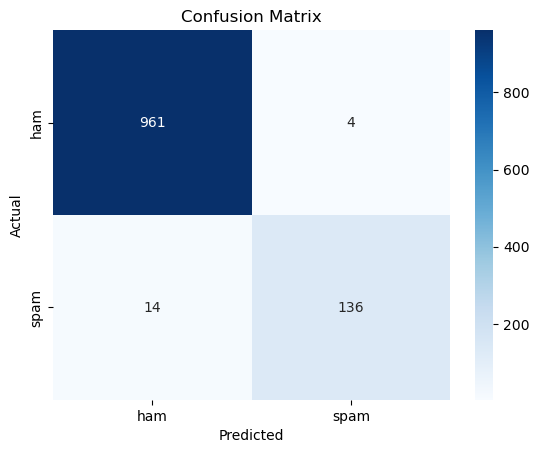

In [21]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

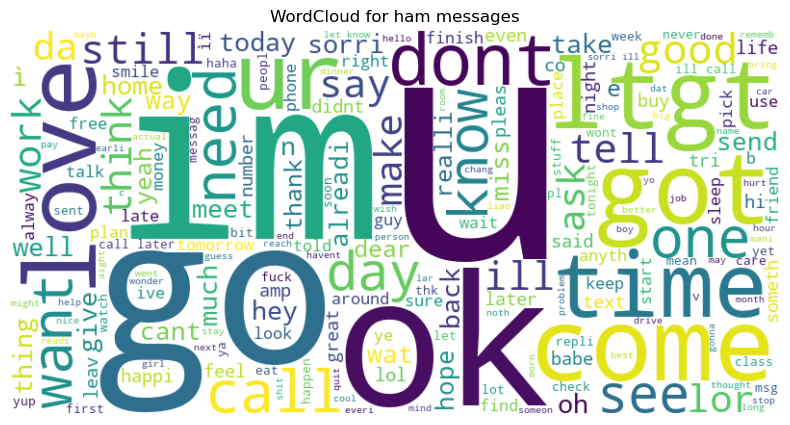

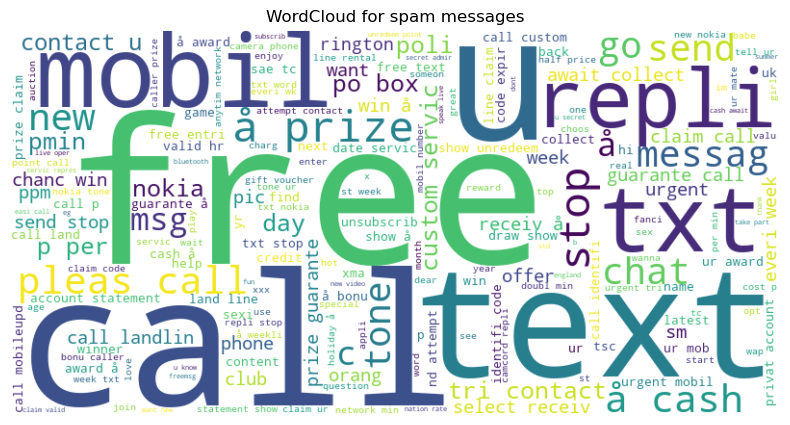

In [22]:
# WordCloud visualization
# For ham messages
ham_text = ' '.join(data[data['label'] == 'ham']['transformed_message'])
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for ham messages')
plt.show()

# For spam messages
spam_text = ' '.join(data[data['label'] == 'spam']['transformed_message'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for spam messages')
plt.show()

# Analysis Questions

In [23]:
# 1.  What is the accuracy of the model?  Report your finding with corresponding tables/graphs.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9839


The accuracy of the Naïve Bayes classifier is 98.3%, as calculated using the test set. This indicates that the model performs very well in distinguishing between spam and ham messages.

Top 5 words in ham messages:
u       988
im      452
go      416
get     364
come    292
Name: count, dtype: int64

Top 5 words in spam messages:
call    368
å£      271
free    219
txt     163
u       155
Name: count, dtype: int64


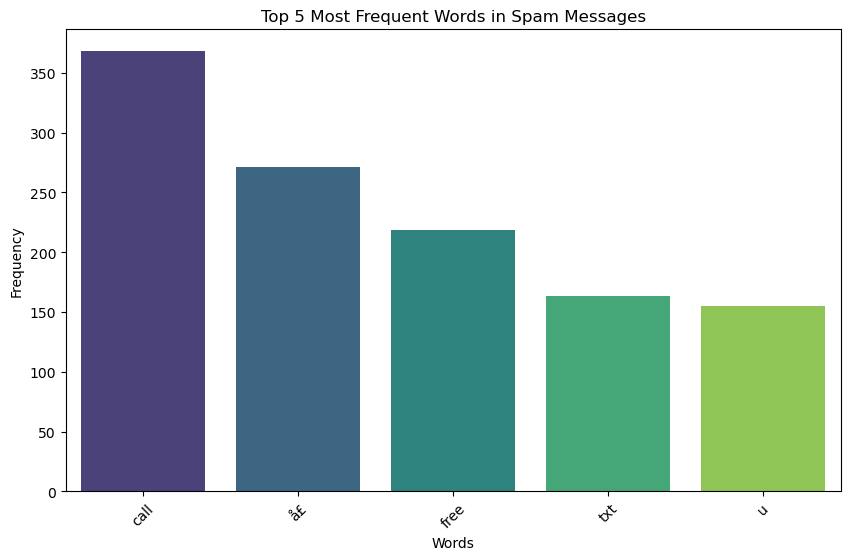

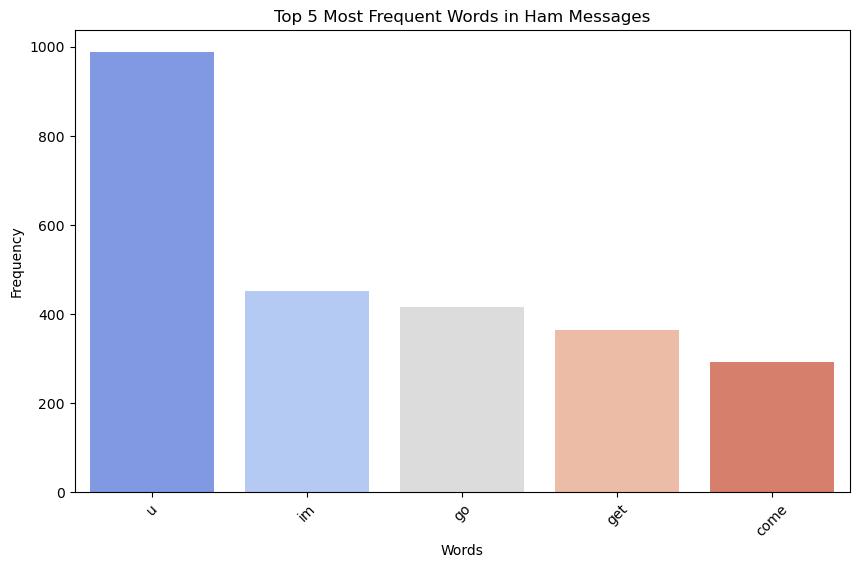


Posterior probabilities for top ham words:
im: -4.5871
go: -4.6318
get: -4.8337
come: -5.0259

Posterior probabilities for top spam words:
call: -3.9111
free: -4.3949
txt: -4.6825


In [31]:
# 2.Print the 5 most frequent words in each class, and their posterior probability generated by the model. 

# Word counts 
#Print the 5 most frequent words in each class
# For ham messages
ham_messages = data[data['label'] == 'ham']['transformed_message']
all_ham_words = ' '.join(ham_messages).split()
ham_word_freq = pd.Series(all_ham_words).value_counts().head(5)

# For spam messages
spam_messages = data[data['label'] == 'spam']['transformed_message']
all_spam_words = ' '.join(spam_messages).split()
spam_word_freq = pd.Series(all_spam_words).value_counts().head(5)

print("Top 5 words in ham messages:")
print(ham_word_freq)
print("\nTop 5 words in spam messages:")
print(spam_word_freq)

# Plotting spam words frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=spam_word_freq.index, y=spam_word_freq.values, palette="viridis")
plt.title("Top 5 Most Frequent Words in Spam Messages")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Plotting ham words frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=ham_word_freq.index, y=ham_word_freq.values, palette="coolwarm")
plt.title("Top 5 Most Frequent Words in Ham Messages")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Calculate posterior probabilities for the top words
# For ham words
print("\nPosterior probabilities for top ham words:")
for word in ham_word_freq.index:
    word_index = vectorizer.vocabulary_.get(word)
    if word_index is not None:
        prob = nb_classifier.feature_log_prob_[0][word_index]
        print(f"{word}: {prob:.4f}")

# For spam words
print("\nPosterior probabilities for top spam words:")
for word in spam_word_freq.index:
    word_index = vectorizer.vocabulary_.get(word)
    if word_index is not None:
        prob = nb_classifier.feature_log_prob_[1][word_index]
        print(f"{word}: {prob:.4f}")


Naive bayes Model performance can be improved using various techniques:

**1. Remove Correlated Features:**

Naive Bayes algorithms perform well on datasets with no correlations in independent features. we can check for correlation of the features and removing the highly correlated features may improve the performance of the algorithm

**2. Feature Engineering:**

Feature engineering techniques such as combine some of the elements, and extract some parts of them out of existing ones. This may help the Naive Bayes algorithm learn the data quickly and results in an accurate model.

**3. Use Some Domain Knowledge:**

Oe should always try to apply some domain knowledge to the dataset and its features and take steps according to it. It may help the algorithm to make decisions faster and achieve higher accuracies.

**4. Probabilistic Features:**

The Naive Bayes algorithm works on the concept of probabilities, so try to improve the features that give more weightage to the algorithms and their probabilities, try to implement those, and run the roses in a loop to know which features are best for the algorithm.

**5. Smoothing or Laplace smoothing Transform:**

In some cases, the category may be present in the test dataset and was not present while training and the model will assign it with zero probability. Here we should handle this issue by using smoothing techniques such as Laplace transform. 

**6. Feature Transformation:**

It is always better to have normal distributions in the datasets and try to apply box-cox and yeo-johnson feature transformation techniques to achieve the normal distributions in the dataset.

**Reference:**

Naive Bayes Algorithms: A Complete Guide for Beginners 
https://www.analyticsvidhya.com/blog/2023/01/naive-bayes-algorithms-a-complete-guide-for-beginners/

**Effect of bigger data set**

1. A larger dataset would likely improve the model's accuracy, as it would provide more examples for the classifier to learn from, especially for rare words or patterns.
2. However, after a certain point the increase in data might not improve the accuracy much but increases the computational cost.